In [204]:
import json
import os.path as osp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set2')

### Load the data

In [108]:
labeled_data_path = '../data/labeled_data.json'
unlabeled_data_path = '../data/unlabeled_data.json'
grouped_labeled_data_path = '../data/grouped_labeled_data.json'

In [113]:
labeled_data_json = json.load(open(labeled_data_path, 'r'))
unlabeled_data_json = json.load(open(unlabeled_data_path, 'r'))

labeled_data_json[list(labeled_data_json.keys())[0]]

{'text': 'beloved coaches teacher students among dead in florida school shooting via',
 'hashtags': [],
 'event': '2018_fl_shooting',
 'links': ['https://t.co/nwy9droysh', '@huffpost'],
 'label': 'low'}

In [201]:
labeled_data_json[list(labeled_data_json.keys())[-4]]

{'text': 'rtd news at epicenter of nepal tragedy local church mission offers help',
 'hashtags': ['rva'],
 'event': '2015_Nepal_Earthquake_en',
 'links': ['http://t.co/djnsfxg4n1', 'http://t.co/fwovqy04n1'],
 'label': 'high'}

### Import it to Pandas

In [5]:
ldj = labeled_data_json
labeled_tweets = pd.DataFrame([(tid, ldj[tid]['text'], ldj[tid]['hashtags'], ldj[tid]['event'], ldj[tid]['links'], ldj[tid]['label']) 
                for tid in ldj.keys()],
                         columns=['tid', 'text', 'hashtags', 'event', 'links', 'label'])
labeled_tweets.describe()

,tid,text,hashtags,event,links,label
count,18283,18283,18283,18283,18283,18283
unique,18283,17153,4157,20,13506,2
top,400230633701924864,typhoon sweeps across philippines,[],2015_Nepal_Earthquake_en,[],low
freq,1,50,7701,5862,4302,15870


Here we show the distribution of the criticallity of the events and the events themselves.

low     15870
high     2413
Name: label, dtype: int64


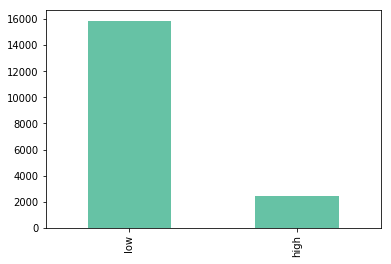

In [177]:
labeled_tweets.label.value_counts().plot(kind='bar')
print(labeled_tweets.label.value_counts())

/home/zal/anaconda3/envs/crittweets/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  """


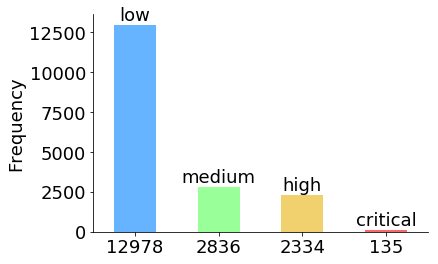

In [222]:
colors = sns.color_palette()
original_count = [12978, 2836, 2334, 135]
original_labels = ['low', 'medium', 'high', 'critical']

original_series = pd.Series.from_array(original_count)

plt.figure()
plt.rcParams.update({'font.size':18})
ax = original_series.plot(kind='bar', color=['#66b3ff', '#99ff99', '#f0d16e',  '#ff6666'])

ax.set_ylabel('Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(original_count, rotation=0)

rects = ax.patches

# Make some labels.
for rect, label in zip(rects, original_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.savefig('../images/original_labels_barplot.pdf')

/home/zal/anaconda3/envs/crittweets/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  """


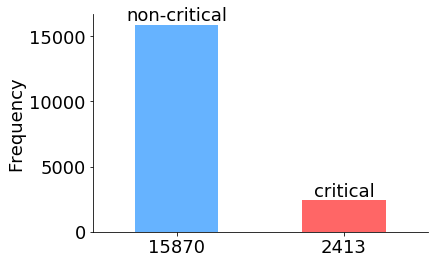

In [223]:
colors = sns.color_palette()
new_count = [15870, 2413]
new_labels = ['non-critical', 'critical']

new_series = pd.Series.from_array(new_count)

plt.figure()
ax = new_series.plot(kind='bar', color=['#66b3ff', '#ff6666'])

ax.set_ylabel('Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(new_count, rotation=0)

rects = ax.patches

# Make some labels.
for rect, label in zip(rects, new_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.savefig('../images/new_labels_barplot.pdf')

2015_Nepal_Earthquake_en               5862
2014_Philippines_Typhoon_Hagupit_en    3941
2015_paris_attack                      2061
2013_Alberta_floods                     721
2013_Queensland_floods                  713
2013_Australia_bushfire                 677
2013_Typhoon_Yolanda                    564
2013_Boston_bombings                    535
2018_fl_shooting                        463
2012_Philipinnes_floods                 437
2013_Manila_floods                      411
2014_Chile_Earthquake_en                311
2012_Colorado_wildfires                 262
2012_Costa_Rica_earthquake              247
2012_Typhoon_Pablo                      244
2013_Colorado_floods                    234
2013_West_Texas_explosion               183
2013_LA_airport_shootings               160
2012_Guatemala_earthquake               154
2012_Italy_earthquakes                  103
Name: event, dtype: int64


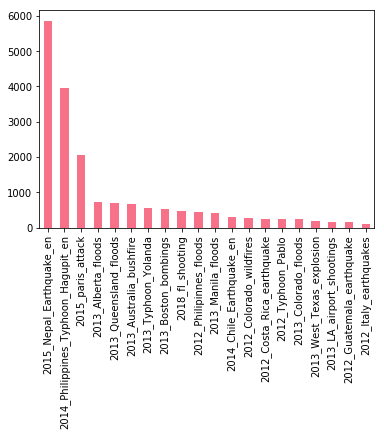

In [7]:
labeled_tweets.event.value_counts().plot(kind='bar')
print(labeled_tweets.event.value_counts())

### Group the events by type of event
Since the type of events is highly skewed toward three events, we will group them according to the type of natural disaster or attack if a human is involved in the origin of the event. The major groups will be as follows:
1. earthquake
1. flood
1. fire
1. attack

In [11]:
earthquake_events = sorted([event for event in set(labeled_tweets.event) if 'earthquake' in event.lower()])
earthquake_events

['2012_Costa_Rica_earthquake',
 '2012_Guatemala_earthquake',
 '2012_Italy_earthquakes',
 '2014_Chile_Earthquake_en',
 '2015_Nepal_Earthquake_en']

In [131]:
flood_events = sorted([event for event in set(labeled_tweets.event) if 'flood' in event.lower()])
flood_events

['2012_Philipinnes_floods',
 '2013_Alberta_floods',
 '2013_Colorado_floods',
 '2013_Manila_floods',
 '2013_Queensland_floods']

In [132]:
typhoon_events = sorted([event for event in set(labeled_tweets.event) if 'typhoon' in event.lower()])
typhoon_events

['2012_Typhoon_Pablo',
 '2013_Typhoon_Yolanda',
 '2014_Philippines_Typhoon_Hagupit_en']

In [133]:
fire_events = sorted([event for event in set(labeled_tweets.event) if 'fire' in event.lower()])
fire_events

['2012_Colorado_wildfires', '2013_Australia_bushfire']

In [135]:
natural_disaster_events = earthquake_events + flood_events + typhoon_events + fire_events
attack_events = sorted([event for event in set(labeled_tweets.event) if event not in natural_disaster_events])
attack_events

['2013_Boston_bombings',
 '2013_LA_airport_shootings',
 '2013_West_Texas_explosion',
 '2015_paris_attack',
 '2018_fl_shooting']

In [136]:
label_grouping_map = dict()
grouped_label_tuples = [(earthquake_events, 'earthquake'), 
                        (flood_events, 'flood'), 
                        (typhoon_events, 'typhoon'), 
                        (fire_events, 'fire'), 
                        (attack_events, 'attack')]
for event_label_list, new_label in grouped_label_tuples:
    for event_label in event_label_list:
        label_grouping_map[event_label] = new_label

labeled_tweets['event_type'] = labeled_tweets.event.replace(to_replace=label_grouping_map)
labeled_tweets.to_json(grouped_labeled_data_path, orient='index')
labeled_tweets

,tid,text,hashtags,event,links,label,event_type
0,964501154347483136,beloved coaches teacher students among dead in...,[],2018_fl_shooting,"[https://t.co/nwy9droysh, @huffpost]",low,attack
1,451609342639603712,8.2 earthquake hits chile 6 dead 300 prisoners...,[us politics],2014_Chile_Earthquake_en,"[http://t.co/170sujr7wi, http://t.co/hdzi6vorwh]",low,earthquake
2,541734809903824898,goodmorning keep safe everyone,"[thy poon ruby, pray forthe philippines l t3]",2014_Philippines_Typhoon_Hagupit_en,[],low,typhoon
3,452272803773808643,mb 4.3 off coast of tarapaca chile magnitude m...,[],2014_Chile_Earthquake_en,[http://t.co/mkziqs2xuj],low,earthquake
4,541772956083716100,ancop usa appeal for victims of super typhoon ...,[],2014_Philippines_Typhoon_Hagupit_en,[http://t.co/g9kkapf3jo],low,typhoon
...,...,...,...,...,...,...,...
18278,350105576149237760,rt the calgary drop-in centre re-opened &amp; ...,[yy c flood],2013_Alberta_floods,"[@cityofcalgary:, .@nenshi]",low,flood
18279,592652777366630400,rtd news at epicenter of nepal tragedy local c...,[rva],2015_Nepal_Earthquake_en,"[http://t.co/djnsfxg4n1, http://t.co/fwovqy04n1]",high,earthquake
18280,665517421738889216,france vows to punish is for paris attacks tha...,[],2015_paris_attack,[https://t.co/pqn4e5ydra],low,attack
18281,324003025674960898,i am honestly sick who could be so disgusting ...,[pray for boston],2013_Boston_bombings,[],low,attack


In [139]:
len(labeled_tweets)

18283

Finally we can see that we have a more balanced dataset according to the type of event

earthquake    6677
typhoon       4749
attack        3402
flood         2516
fire           939
Name: event_type, dtype: int64


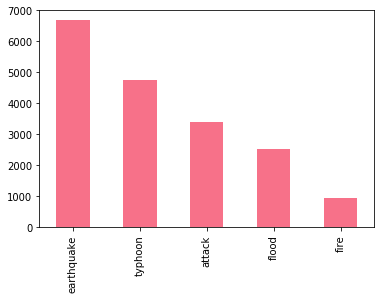

In [140]:
labeled_tweets.event_type.value_counts().plot(kind='bar')
print(labeled_tweets.event_type.value_counts())

In [141]:
for i, event_type in enumerate(set(labeled_tweets.event_type), start=1):
    print(f'{i}. {event_type}: {len(labeled_tweets[labeled_tweets.event_type==event_type])}')
    print(labeled_tweets[labeled_tweets.event_type==event_type].event.value_counts())

1. earthquake: 6677
2015_Nepal_Earthquake_en      5862
2014_Chile_Earthquake_en       311
2012_Costa_Rica_earthquake     247
2012_Guatemala_earthquake      154
2012_Italy_earthquakes         103
Name: event, dtype: int64
2. flood: 2516
2013_Alberta_floods        721
2013_Queensland_floods     713
2012_Philipinnes_floods    437
2013_Manila_floods         411
2013_Colorado_floods       234
Name: event, dtype: int64
3. attack: 3402
2015_paris_attack            2061
2013_Boston_bombings          535
2018_fl_shooting              463
2013_West_Texas_explosion     183
2013_LA_airport_shootings     160
Name: event, dtype: int64
4. typhoon: 4749
2014_Philippines_Typhoon_Hagupit_en    3941
2013_Typhoon_Yolanda                    564
2012_Typhoon_Pablo                      244
Name: event, dtype: int64
5. fire: 939
2013_Australia_bushfire    677
2012_Colorado_wildfires    262
Name: event, dtype: int64


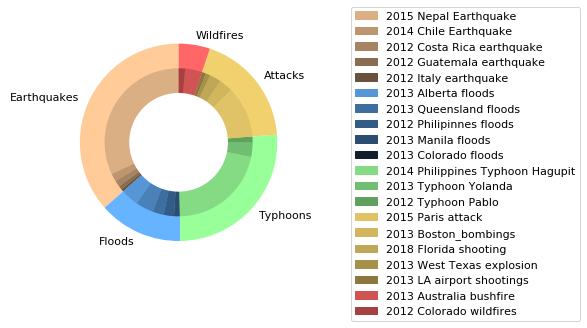

In [221]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from matplotlib.lines import Line2D
 
# Data to plot
labels = ['Earthquakes', 'Floods', 'Typhoons', 'Attacks', 'Wildfires']
sizes = [6677, 2516, 4749, 3402, 939]
sizes_gender = [5862, 311, 247, 154, 103, 
                721, 713, 437, 411, 234, 
                3941, 564, 244,
                2061, 535, 463, 183, 160,
                677, 262 ]
colors = ['#ffcc99', '#66b3ff', '#99ff99', '#f0d16e',  '#ff6666']
colors_earthquake = ['#dbaf84','#bd966f', '#a68462','#8a6d51', '#69523d']
colors_flood = ['#5696d6','#4981b8','#3e6e9e','#325b85','#2b4d70']
colors_typhoon = ['#84db84', '#71bd71', '#60a160']
colors_attack = ['#e0c367', '#d1b65e', '#bfa758', '#a6914b', '#8a783e']
colors_fire = ['#d15454','#a64141']
colors_gender = colors_earthquake + colors_flood + colors_typhoon + colors_attack + colors_fire

# Legend
legend_elements = [Patch(color='#dbaf84', label='2015 Nepal Earthquake'),
                   Patch(color='#bd966f', label='2014 Chile Earthquake'),
                   Patch(color='#a68462', label='2012 Costa Rica earthquake'),
                   Patch(color='#8a6d51', label='2012 Guatemala earthquake'),
                   Patch(color='#69523d', label='2012 Italy earthquake '),
                   Patch(color='#5696d6', label='2013 Alberta floods'),
                   Patch(color='#3e6e9e', label='2013 Queensland floods'),
                   Patch(color='#325b85', label='2012 Philipinnes floods'),
                   Patch(color='#2b4d70', label='2013 Manila floods'),
                   Patch(color='#111e2b', label='2013 Colorado floods'),
                   Patch(color='#84db84', label='2014 Philippines Typhoon Hagupit'),
                   Patch(color='#71bd71', label='2013 Typhoon Yolanda'),
                   Patch(color='#60a160', label='2012 Typhoon Pablo'),
                   Patch(color='#e0c367', label='2015 Paris attack'),
                  Patch(color='#d1b65e', label='2013 Boston_bombings'),
                  Patch(color='#bfa758', label='2018 Florida shooting'),
                  Patch(color='#a6914b', label='2013 West Texas explosion'),
                  Patch(color='#8a783e', label='2013 LA airport shootings'),
                  Patch(color='#d15454', label='2013 Australia bushfire'),
                  Patch(color='#a64141', label='2012 Colorado wildfires'),
                  ]

# Plot
plt.rcParams.update({'font.size':11})
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gender, colors=colors_gender, radius=0.75, startangle=90)
centre_circle = plt.Circle((0,0),0.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
# plt.tight_layout()
plt.legend(handles=legend_elements, bbox_to_anchor=(1., 1.15))
plt.savefig('../images/dataset_piechart.pdf', bbox_inches = "tight")
plt.show()